<a href="https://colab.research.google.com/github/Sagor0078/AI/blob/main/Image_Processing_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

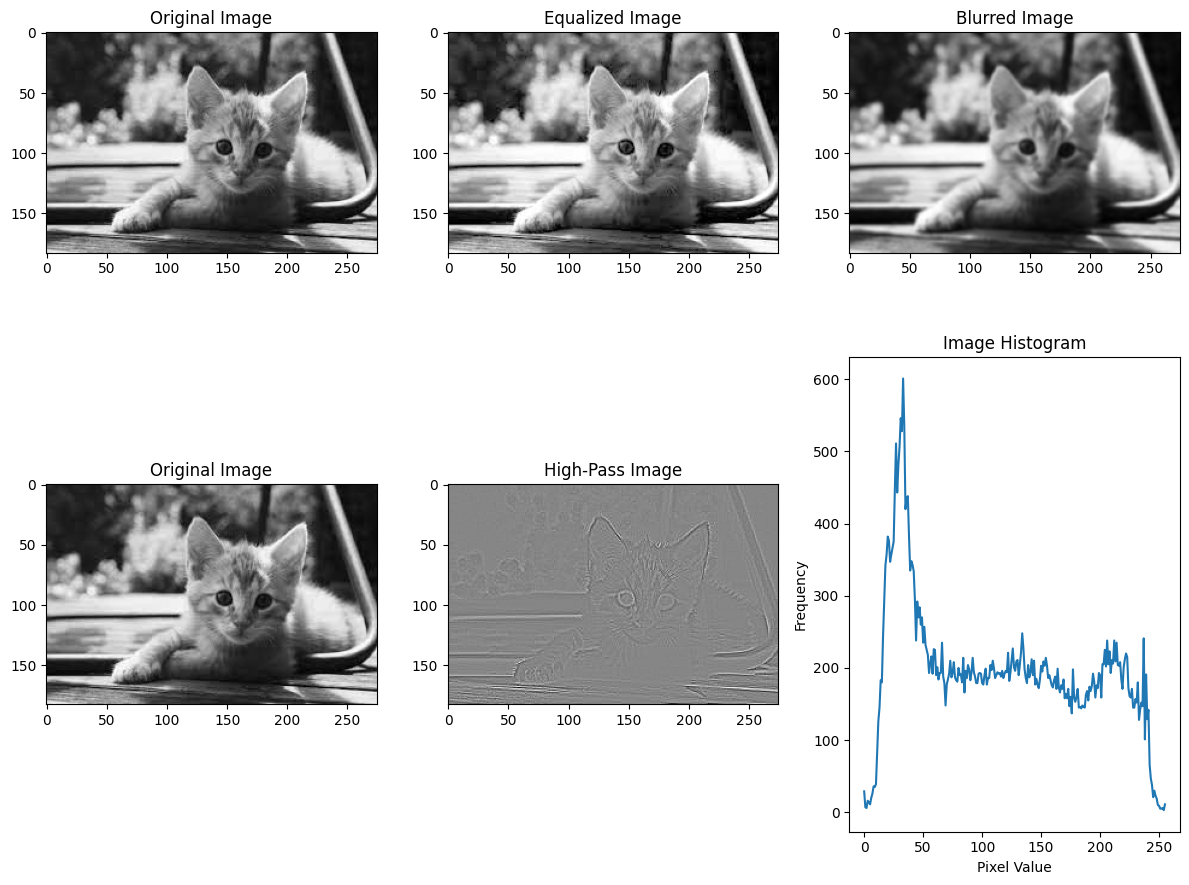

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Image_Lab/image lab/cat.jpg', cv2.IMREAD_GRAYSCALE)

# Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Low-Pass Filtering (Gaussian Blur)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# High-Pass Filtering (Laplacian)
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)

# Calculate Histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(232)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(233)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')

plt.subplot(234)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(235)
plt.imshow(laplacian_image, cmap='gray')
plt.title('High-Pass Image')

plt.subplot(236)
plt.plot(hist)
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Total Rice Grains: 77
Average Area: 157.52597402597402
Average Major Axis Length: 28.834813303761667
Average Perimeter: 73.00335669981969


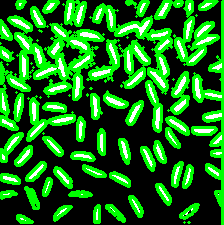

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# image = cv2.imread('/content/drive/MyDrive/Image_Lab/image lab/rice.tif', cv2.IMREAD_GRAYSCALE)
# plt.imshow(image,cmap = 'gray')

# Load the rice.tif image in grayscale
image_path = '/content/drive/MyDrive/Image_Lab/image lab/rice.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment the rice grains
_, binary_image = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

# Find contours of rice grains
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store rice statistics
total_rice = 0
total_area = 0
total_major_axis_length = 0
total_perimeter = 0

# Iterate through the detected rice grains
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if area > 50:  # Filter out small noise contours
        total_rice += 1
        total_area += area
        ellipse = cv2.fitEllipse(contour)
        major_axis_length = max(ellipse[1])
        total_major_axis_length += major_axis_length
        total_perimeter += perimeter

# Calculate average statistics
average_area = total_area / total_rice
average_major_axis_length = total_major_axis_length / total_rice
average_perimeter = total_perimeter / total_rice

# Display results
print("Total Rice Grains:", total_rice)
print("Average Area:", average_area)
print("Average Major Axis Length:", average_major_axis_length)
print("Average Perimeter:", average_perimeter)

# Draw contours on the image
contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours using Colab's cv2_imshow
cv2_imshow(contour_image)


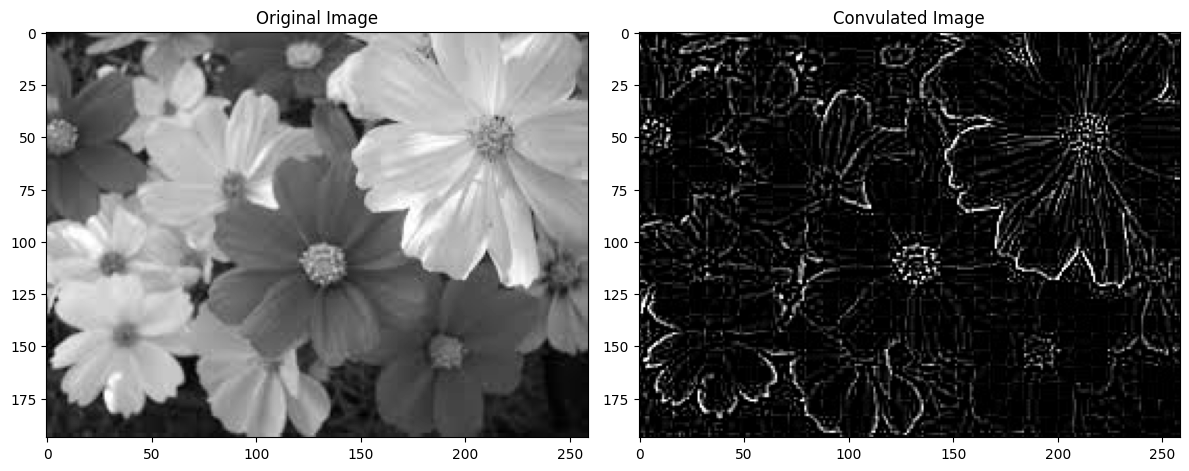

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a 3x3 convolution mask (example: edge detection)
convolution_mask = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Apply convolution using the filter2D function
convolved_image = cv2.filter2D(image, -1, convolution_mask)

# Display the original and convolved images
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.imshow(image,cmap = 'gray')
plt.title("Original Image")
plt.subplot(222)
plt.imshow(convolved_image,cmap = 'gray')
plt.title("Convulated Image")

plt.tight_layout()
plt.show()


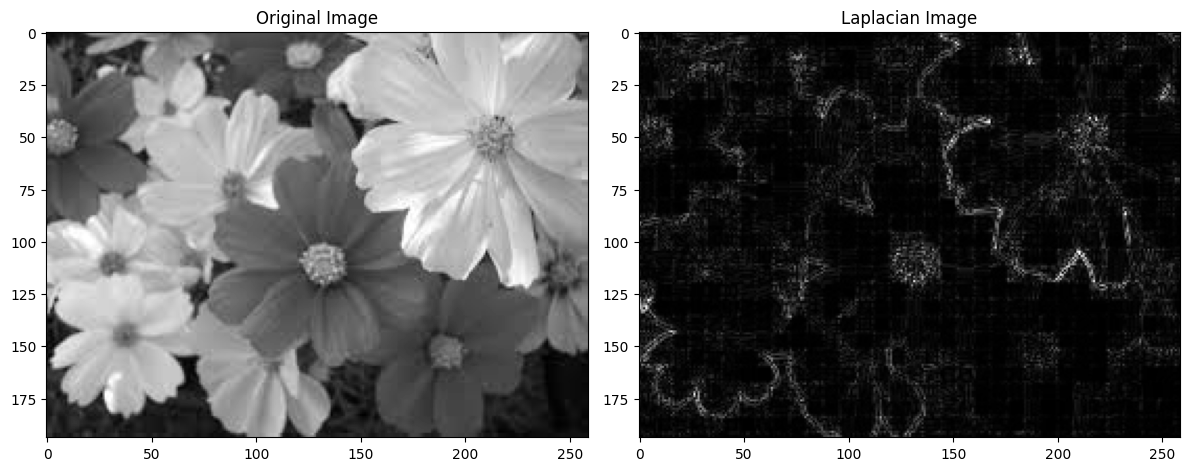

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter using the Laplacian function
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)

# Convert the result to unsigned 8-bit (normalize the output)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

# Display the original and Laplacian-filtered images
plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(image,cmap = 'gray')
plt.title("Original Image")
plt.subplot(222)
plt.imshow(laplacian_image,cmap = 'gray')
plt.title("Laplacian Image")

plt.tight_layout()
plt.show()

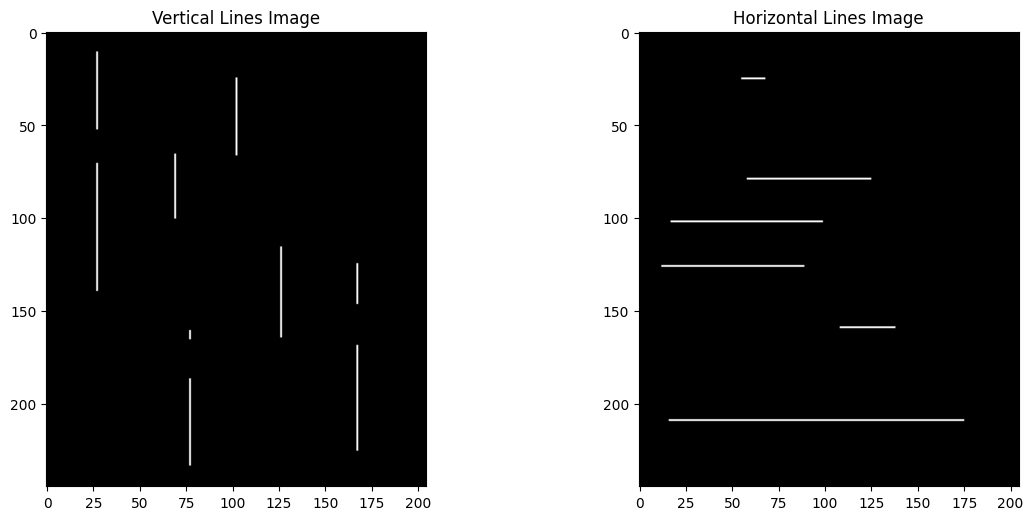

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/iamgeline.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


kernel_vertical = np.ones((13, 1), np.uint8)
kernel_horizontal = np.ones((1, 15), np.uint8)

verticalLines = cv2.erode(image, kernel_vertical, iterations=1)
horizontalLines = cv2.erode(image, kernel_horizontal, iterations=1)

plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.imshow(verticalLines, cmap='gray')
plt.title('Vertical Lines Image')

plt.subplot(222)
plt.imshow(horizontalLines, cmap='gray')
plt.title('Horizontal Lines Image')

plt.tight_layout()
plt.show()

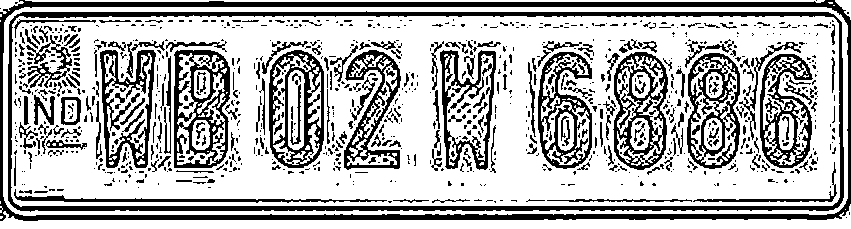

Character: ~


In [19]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow


'''
# Install Tesseract (if not installed)
# !apt-get install tesseract-ocr

# Install pytesseract (if not installed)
# !pip install pytesseract

# Specify the Tesseract executable path (not always necessary in Colab)
# pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

'''

# Replace this with your actual image file path
file = '/content/drive/MyDrive/Image_Lab/image lab/charecterSegmentation.jpeg'

# Read the image
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

# Resize the image to improve OCR accuracy
resized_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Apply adaptive thresholding to enhance character visibility
threshold_img = cv2.adaptiveThreshold(resized_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

# Get image dimensions
h, w = threshold_img.shape

# Perform OCR using pytesseract
boxes = pytesseract.image_to_boxes(threshold_img)

# Process and display individual characters
for b in boxes.splitlines():
    b = b.split(' ')
    char, x, y, x2, y2 = b[0], int(b[1]), int(b[2]), int(b[3]), int(b[4])

    # Ensure the coordinates are within valid range
    x = max(0, min(x, w - 1))
    y = max(0, min(y, h - 1))
    x2 = max(0, min(x2, w - 1))
    y2 = max(0, min(y2, h - 1))

    # Extract individual character and convert to 3-channel color image
    char_img = threshold_img[y:y2, x:x2]
    char_img_color = cv2.cvtColor(char_img, cv2.COLOR_GRAY2BGR)

    # Display individual character using OpenCV
    cv2_imshow(char_img_color)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    print("Character:", char)


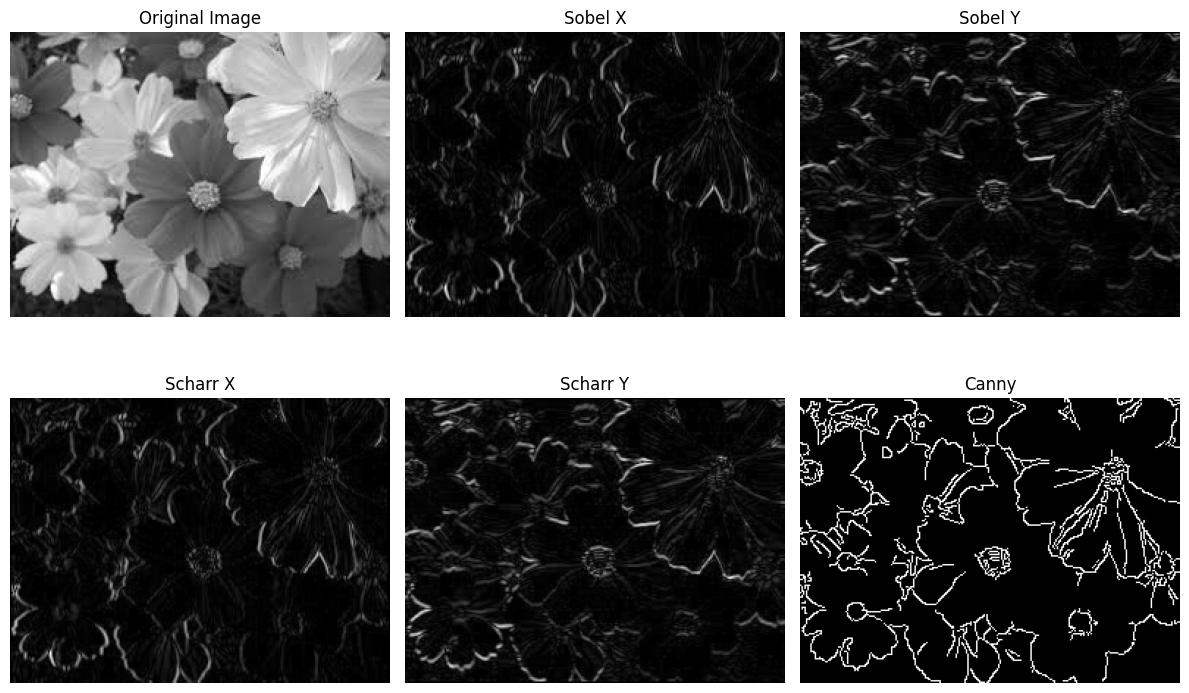

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/flow.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection using different operators
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
canny = cv2.Canny(image, 100, 200)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(np.abs(scharr_x), cmap='gray')
plt.title('Scharr X')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(scharr_y), cmap='gray')
plt.title('Scharr Y')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.tight_layout()
plt.show()


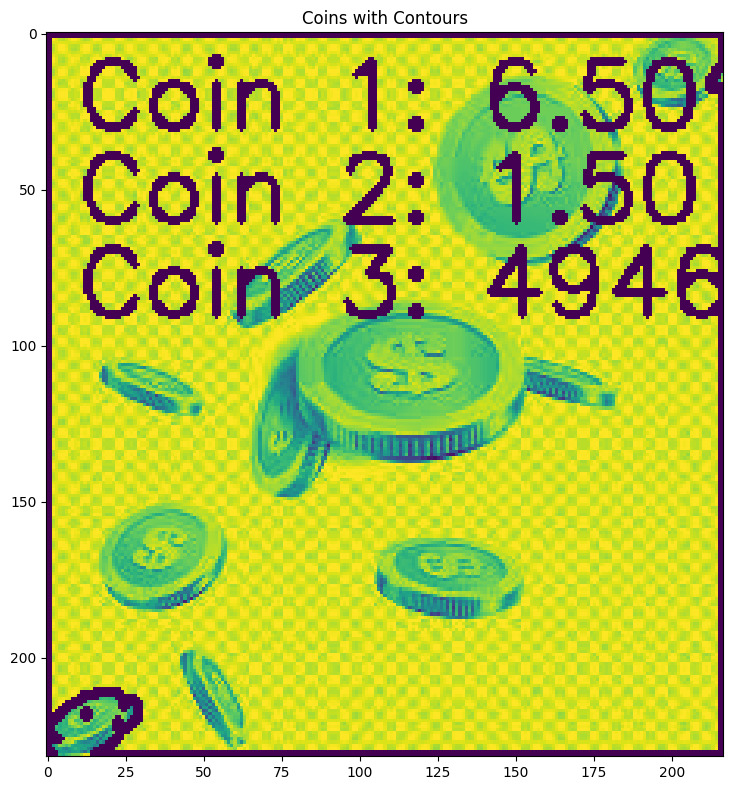

Total area of all coins: 49474.00 pixels


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the coins.png image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/coins.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and enhance segmentation
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's thresholding to binarize the image
_, thresholded = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate areas of all coins and display
total_area = 0

for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    total_area += area
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 2)
    cv2.putText(image, f"Coin {idx+1}: {area:.2f}", (10, 30*(idx+1)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the image with contours and labeled areas
plt.figure(figsize = (10,8))
plt.imshow(image)
plt.title("Coins with Contours")
plt.tight_layout()
plt.show()


# Print the total area of all coins
print(f"Total area of all coins: {total_area:.2f} pixels")


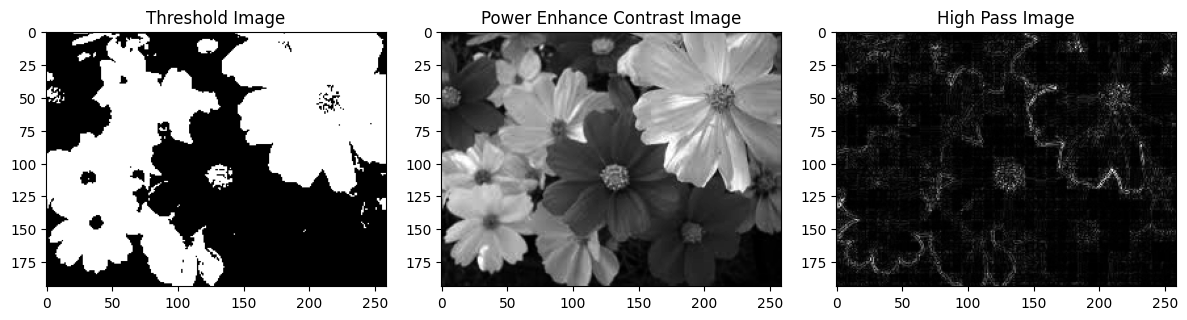

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/flow.jpg'  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold Image
_, threshold_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Power Enhance Contrast Image
gamma = 1.5  # Adjust the gamma value for desired contrast enhancement
power_enhanced_img = np.power(image / 255.0, gamma)
power_enhanced_img = np.uint8(power_enhanced_img * 255)

# High Pass Image (using Laplacian)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
high_pass_img = cv2.convertScaleAbs(laplacian)

# Display the images using matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(131)
plt.imshow(threshold_img, cmap='gray')
plt.title('Threshold Image')

plt.subplot(132)
plt.imshow(power_enhanced_img, cmap='gray')
plt.title('Power Enhance Contrast Image')

plt.subplot(133)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High Pass Image')

plt.tight_layout()
plt.show()


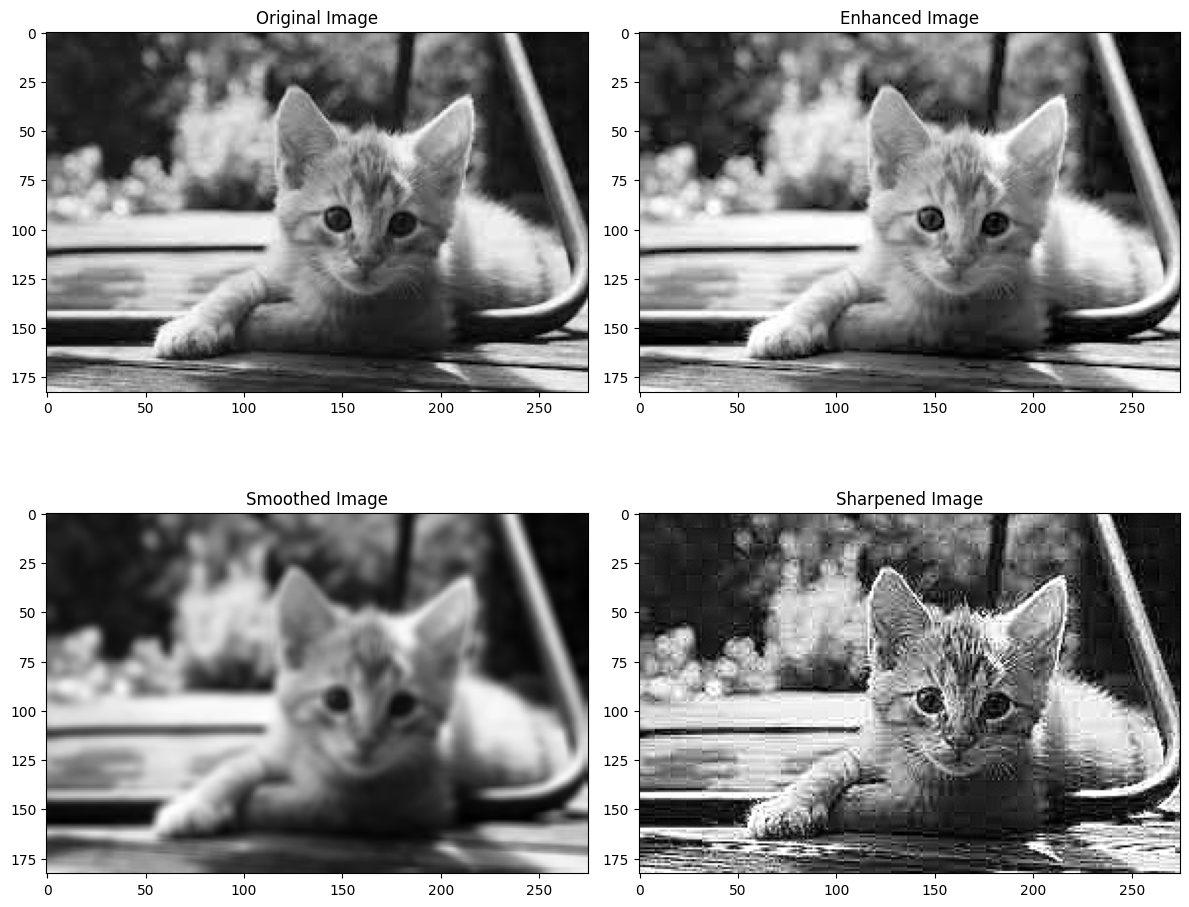

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Image_Lab/image lab/cat.jpg'  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Image Enhancement (Histogram Equalization)
enhanced_img = cv2.equalizeHist(image)

# Smoothing (Averaging)
kernel_size = 5  # Adjust the kernel size for desired smoothing
smoothed_img = cv2.blur(image, (kernel_size, kernel_size))

# Sharpening (Laplacian)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
sharpened_img = cv2.convertScaleAbs(image - laplacian)

# Display the images using matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image')

plt.subplot(223)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(224)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()


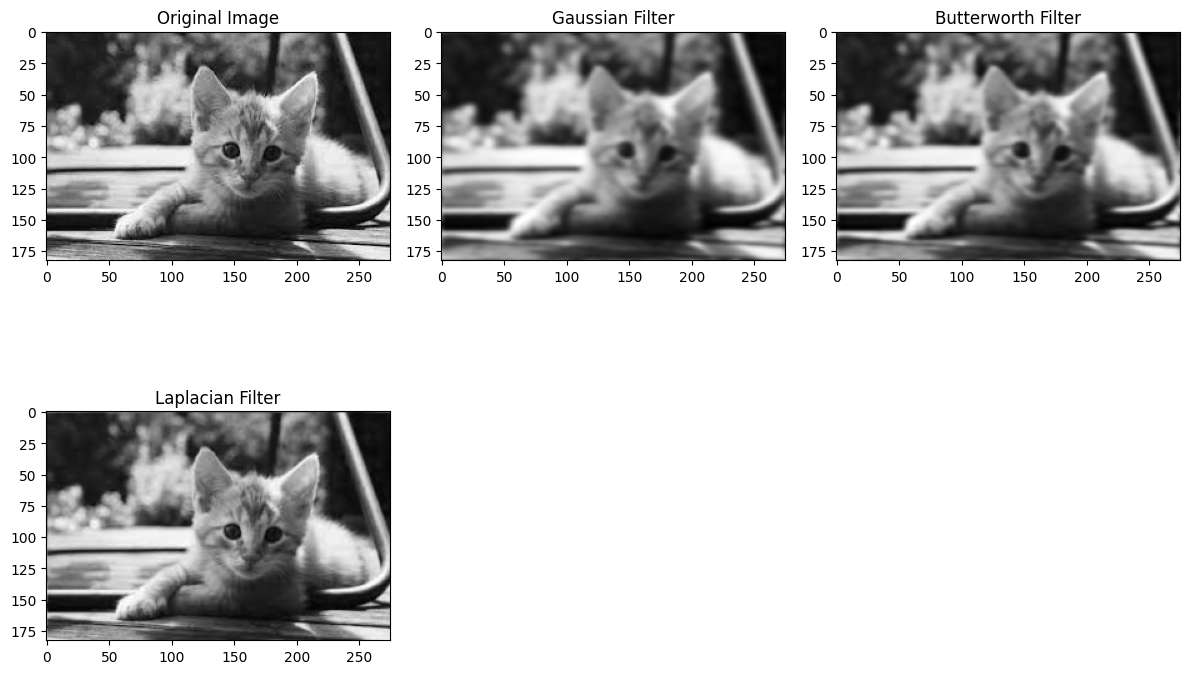

Metrics for Gaussian Filter:
MSE: 266.041064417238
PSNR: 23.8813168411142
SSIM: 0.8315490944980155

Metrics for Butterworth Filter:
MSE: 159.46017773768736
PSNR: 26.104281170364857
SSIM: 0.8893114448765075

Metrics for Laplacian Filter:
MSE: 851527.6843925313
PSNR: -11.171184111998976
SSIM: 0.05448626313601396


<ipython-input-38-1c515822a1bf>:70: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_gaussian = peak_signal_noise_ratio(image, gaussian_output)
<ipython-input-38-1c515822a1bf>:74: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_butterworth = peak_signal_noise_ratio(image, butterworth_output)
<ipython-input-38-1c515822a1bf>:78: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_laplacian = peak_signal_noise_ratio(image, laplacian_output)


In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

# Load the image
image = cv2.imread('/content/drive/MyDrive/Image_Lab/image lab/cat.jpg', cv2.IMREAD_GRAYSCALE)

# Perform FFT
f_transform = fft2(image)
f_transform_shifted = fftshift(f_transform)

# Define filter functions
def gaussian_filter(shape, sigma):
    x, y = shape
    center_x, center_y = x // 2, y // 2
    u, v = np.meshgrid(np.arange(y) - center_y, np.arange(x) - center_x)
    return np.exp(-(u**2 + v**2) / (2 * sigma**2))

def butterworth_filter(shape, cutoff, n):
    x, y = shape
    center_x, center_y = x // 2, y // 2
    u, v = np.meshgrid(np.arange(y) - center_y, np.arange(x) - center_x)
    d = np.sqrt(u**2 + v**2)
    return 1 / (1 + (d / cutoff)**(2 * n))

# Apply filters
gaussian_sigma = 20
butterworth_cutoff = 30
butterworth_n = 2

gaussian_result = f_transform_shifted * gaussian_filter(image.shape, gaussian_sigma)
butterworth_result = f_transform_shifted * butterworth_filter(image.shape, butterworth_cutoff, butterworth_n)

# Apply Laplacian filter
laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_filter_transformed = fft2(laplacian_filter, s=image.shape)
laplacian_result = f_transform_shifted * laplacian_filter_transformed

# Inverse FFT
gaussian_output = np.abs(ifft2(fftshift(gaussian_result)))
butterworth_output = np.abs(ifft2(fftshift(butterworth_result)))
laplacian_output = np.abs(ifft2(fftshift(laplacian_result)))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_output, cmap='gray')
plt.title('Gaussian Filter')

plt.subplot(2, 3, 3)
plt.imshow(butterworth_output, cmap='gray')
plt.title('Butterworth Filter')

plt.subplot(2, 3, 4)
plt.imshow(laplacian_output, cmap='gray')
plt.title('Laplacian Filter')

plt.tight_layout()
plt.show()

# Calculate metrics
mse_gaussian = mean_squared_error(image, gaussian_output)
psnr_gaussian = peak_signal_noise_ratio(image, gaussian_output)
ssim_gaussian = structural_similarity(image, gaussian_output, data_range=image.max() - image.min())  # Specify data_range

mse_butterworth = mean_squared_error(image, butterworth_output)
psnr_butterworth = peak_signal_noise_ratio(image, butterworth_output)
ssim_butterworth = structural_similarity(image, butterworth_output, data_range=image.max() - image.min())  # Specify data_range

mse_laplacian = mean_squared_error(image, laplacian_output)
psnr_laplacian = peak_signal_noise_ratio(image, laplacian_output)
ssim_laplacian = structural_similarity(image, laplacian_output, data_range=image.max() - image.min())  # Specify data_range

# Print metrics
print("Metrics for Gaussian Filter:")
print("MSE:", mse_gaussian)
print("PSNR:", psnr_gaussian)
print("SSIM:", ssim_gaussian)
print()

print("Metrics for Butterworth Filter:")
print("MSE:", mse_butterworth)
print("PSNR:", psnr_butterworth)
print("SSIM:", ssim_butterworth)
print()

print("Metrics for Laplacian Filter:")
print("MSE:", mse_laplacian)
print("PSNR:", psnr_laplacian)
print("SSIM:", ssim_laplacian)

